# Data visualization and analysis of COVID-19 Dataset
The dataset used is from kaggle provided by DS4C: Data Science for COVID-19 in South Korea.
The dataset consists of records of 3200 patients and 18 columns.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("PatientInfo.csv")
print(data.head())


   patient_id  global_num     sex  birth_year  age country province  \
0  1000000001         2.0    male      1964.0  50s   Korea    Seoul   
1  1000000002         5.0    male      1987.0  30s   Korea    Seoul   
2  1000000003         6.0    male      1964.0  50s   Korea    Seoul   
3  1000000004         7.0    male      1991.0  20s   Korea    Seoul   
4  1000000005         9.0  female      1992.0  20s   Korea    Seoul   

          city disease        infection_case  infection_order   infected_by  \
0   Gangseo-gu     NaN       overseas inflow              1.0           NaN   
1  Jungnang-gu     NaN       overseas inflow              1.0           NaN   
2    Jongno-gu     NaN  contact with patient              2.0  2.002000e+09   
3      Mapo-gu     NaN       overseas inflow              1.0           NaN   
4  Seongbuk-gu     NaN  contact with patient              2.0  1.000000e+09   

   contact_number symptom_onset_date confirmed_date released_date  \
0            75.0         202

# Generation of histogram with age and number of infected cases
The data contains the age group ranging from less than 10 to above 100 with a decade difference(0s, 10s,20s....100s)

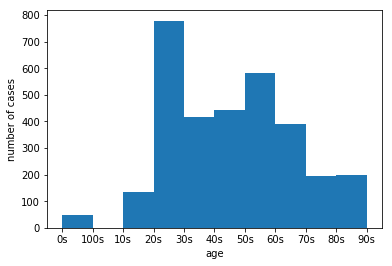

In [16]:
plt.hist(data['age'].dropna())
plt.xlabel("age")
plt.ylabel("number of cases")
plt.show()

# Generation of bar chart representing  number of infected cases with respect to gender

<Container object of 2 artists>

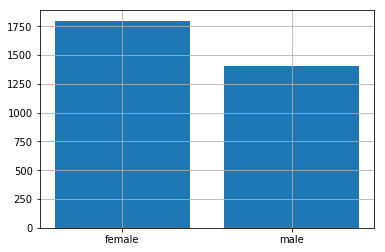

In [7]:
pop=data['sex'].value_counts().to_dict()
plt.grid()
plt.bar(pop.keys(),pop.values())

# Generation of bar chart representing number of cases with respect to age group for each gender

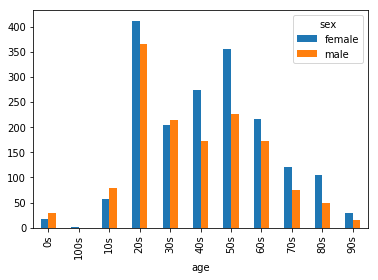

In [8]:
df=data.groupby(['age','sex'])['patient_id'].count()
df.unstack().plot(kind='bar')

# Generation of pie chart representing the number of death according to gender

{'female': 21, 'male': 39}


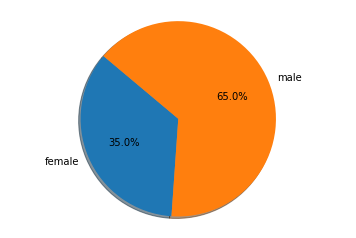

In [10]:
df3=data.groupby('sex')['deceased_date'].count().to_dict()
print(df3)
plt.pie(df3.values(),labels=df3.keys(),autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Generation of pie chart representing the number of death according age group

{'0s': 0, '100s': 0, '10s': 0, '20s': 0, '30s': 1, '40s': 0, '50s': 7, '60s': 11, '70s': 16, '80s': 19, '90s': 6}


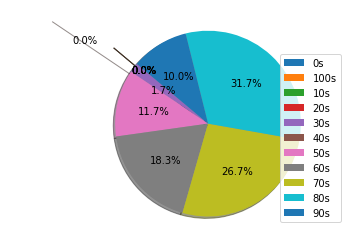

In [11]:
df4=data.groupby('age')['deceased_date'].count().to_dict()
print(df4)
explode = (0.3,0.3,0.3,0.3,0,1,0,0,0,0,0)
plt.pie(df4.values(),autopct='%1.1f%%',explode=explode, shadow=True, startangle=140)
plt.axis('equal')
plt.legend(df4.keys(),loc='lower right')
plt.show()

# Calculating the average number of days for releasing a paitents after confromation of the virus and the average number of days when paitents passed aways after the confromation of the virus.


In [2]:
data['confirmed']=pd.to_datetime(data['confirmed_date'])
data['released']=pd.to_datetime(data['released_date'])
data['diff_confirmed_released']=(data['released']-data['confirmed'])
print("The average number of days people were realesed after confromation of the virius is :"+str(data['diff_confirmed_released'].mean())[:7])
data['deceased']=pd.to_datetime(data['deceased_date'])
data['diff_confirmed_deceased']=(data['deceased']-data['confirmed'])
print(" The average number of days when paitents passed aways after the confromation of the virus :"+str(data['diff_confirmed_deceased'].mean())[:7])

The average number of days people were realesed after confromation of the virius is :21 days
 The average number of days when paitents passed aways after the confromation of the virus :8 days 


# Conclusion
According to the data it is clear that females tend to be slightly more infected by the virus then males and the age group from 20s to 60s are also infected more with respect to age with 20s age group being highly infected in both the gender.The mortality rate is about 2%. Even though females have been infected slightly higher but male tend to count more upto about two third of the date rate.Also in case of the age group people from 50s and higher have a fatal rate while the chance of getting infected for age from 20s to 60s is high.
